# Table of Contents
 <p><div class="lev1"><a href="#Build-a-list-of-snowpack"><span class="toc-item-num">1&nbsp;&nbsp;</span>Build a list of snowpack</a></div><div class="lev1"><a href="#Run-the-model"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run the model</a></div>

**How to run a sensitivity study on snowpack properties ?**

SMRT is able to run the model for a sensor that have a list of frequencies, angles or polarization automatically. However, for snowpack properties setting for instance the corr_length in a layer to a list (or array) does not work (yet). It is necessary to do a little more programming, but it is not so complex.

First import the various module we always need:

In [1]:
import numpy as np
import smrt
import matplotlib.pyplot as plt
%matplotlib inline

Build a list of snowpack
==========================

We want to test the sensitivity of TB's to the corr_length. We first build a list of snowpack with different corr_length

In [2]:
# prepare the snowpack
density = 300.0
corr_length = np.arange(0, 0.5, 0.01) *1e-3  # from 0 to 0.5mm

# the naive way: without list comprehension

snowpack = list()
for x in corr_length:
    sp = smrt.make_snowpack([10], "exponential", density=[density], temperature=[265], corr_length=x)
    snowpack.append(sp)

A better way is to use list comprehension. To achieve the same as these latter 4 last lines:

In [3]:
# the one-liner one: with list comprehension (start reading by the end)
snowpack = [smrt.make_snowpack([10], "exponential", density=[density], temperature=[265], corr_length=x) for x in corr_length]

Run the model
================

Let's first define a model and a sensor. 

In [4]:
model = smrt.make_model("iba", "dort")
sensor = smrt.sensor_list.passive(37e9, 55)

Now we have a list of snowpacks, we want to call the model for each snowpack. We can use list comprehension again.

In [5]:
results = [model.run(sensor, sp) for sp in snowpack]

This return a list of results. To extract the TB V for each result can be done with another list comprehension. And then we plot the results.

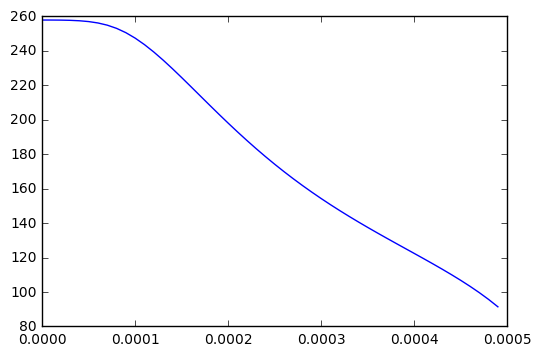

In [6]:
tbv = [res.TbV() for res in results]
plt.figure()
plt.plot(corr_length, tbv)

Nice ? We can do better because Model can directly run on a list of snowpacks. However, it does not return a list of results, but simply a unique result with a new coordinate.

In [7]:
results = model.run(sensor, snowpack, snowpack_dimension=('corr_length', corr_length))
print(type(results))  # look results is a Result
print()
print(results.coords) # look, we have several coordinates, one is call corr_legn

<class 'smrt.core.result.Result'>

Coordinates:
  * theta         (theta) float64 0.9599
  * polarization  (polarization) <U1 'V' 'H'
  * corr_length   (corr_length) float64 0.0 1e-05 2e-05 3e-05 4e-05 5e-05 ...


Now we can call TbV() directly because we have a Result instance

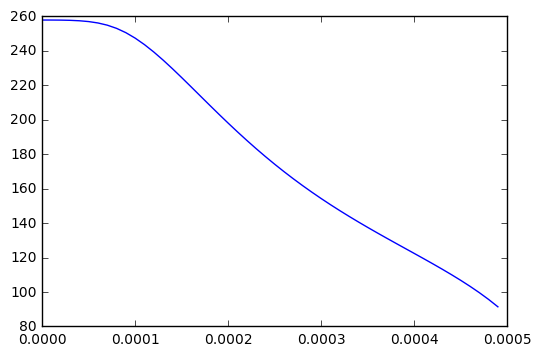

In [8]:
plt.figure()
plt.plot(corr_length, results.TbV())